<a href="https://colab.research.google.com/github/alijahwyatt/assignment4/blob/main/Copy_of_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

In [1]:
! git clone https://www.github.com/DS3001/assignment4

Cloning into 'assignment4'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 6
Receiving objects: 100% (8/8), 265.63 KiB | 3.85 MiB/s, done.


**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general? Most Expensive : MG Motor, Jeep, Kia. The prices have a normal distribution.
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much? The $R^2$ and `RMSE` for each of the models are as follows with $R^2$ and `RMSE`listed consecutively: 1 - .42 and . 34, 2 - .69 and .25, 3 - .83 and .18. The joint model performs vastly better when compared to the first two models (an increase in $R^2$ and decrease in `RMSE`.
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3? The $R^2$ gets more negative while the RMSE stayed the same. The model doesn't fit the data as well as the third one from the previous question and the values were -1535578.264 and 0.18.
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model. The predicted and true values appear to line up along the diagonal. The residuals look pretty bell-shaped around 0 and the model appears to have predictions close to the actual values. One weakness is the possibility of the model overfitting the data.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results? 10 gives the best results.
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? The values line up properly against the diagonal and the residuals appear bell-shaped.
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set? The linear model.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [22]:
df = pd.read_csv('./assignment4//data/cars_hw.csv')

In [23]:
print(df['Price'].unique(), '\n')
print(df['Price'].value_counts(), '\n')

[ 657000  682000  793000  414000  515000  604000  316000 1419000  710000
  392000  613000  598000  969000 2100000  666000 1039000  858000  860000
  680000  625000  567000  371000 1076000  587000  396000  554000  984000
  507000  586000  639000  237000  536000  456000 1107000  571000  629000
  718000  877000  774000  829000  530000  367000  550000  660000  998000
 1012000 1537000  908000  508000  417000  725000  980000  796000  435000
  481000  442000  759000  455000 1972000 1138000  920000 1742000  568000
  419000  476000  577000  541000  730000 1875000  622000  937000  609000
  412000  638000  807000  590000  651000  694000 1364000  783000  628000
  885000  724000  470000 1085000  620000  659000  953000 1173000  457000
  461000  471000  902000  791000  506000  594000  362000  914000  544000
  513000  737000  664000 1027000  575000  842000  742000 1071000 1044000
 1649000  626000  320000  579000  608000  773000  615000  519000  869000
 1399000  356000  562000  522000  699000  510000  5

In [24]:
df['Price'] = np.log(df['Price'])

In [25]:
print(df['Color'].unique(), '\n')
print(df['Color'].value_counts(), '\n')

['silver' 'red' 'white' 'bronze' 'orange' 'grey' 'blue' 'yellow' 'beige'
 'brown' 'golden' 'black' 'maroon' 'purple' 'green'] 

white     200
red       187
grey      164
silver    132
blue      128
brown      70
black      35
orange     19
bronze     12
beige       9
yellow      6
purple      6
golden      3
maroon      3
green       2
Name: Color, dtype: int64 



In [26]:
print(df['Seating_Capacity'].unique(), '\n')
print(df['Seating_Capacity'].value_counts(), '\n')

[5 7 8 6 4] 

5    930
7     39
8      5
6      1
4      1
Name: Seating_Capacity, dtype: int64 



In [27]:
print(df['Body_Type'].unique(), '\n')
print(df['Body_Type'].value_counts(), '\n')

['sedan' 'crossover' 'suv' 'hatchback' 'muv'] 

hatchback    484
sedan        227
suv          206
muv           38
crossover     21
Name: Body_Type, dtype: int64 



In [28]:
print(df['Make'].unique(), '\n')
print(df['Make'].value_counts(), '\n')

['Volkswagen' 'Hyundai' 'Honda' 'Renault' 'Tata' 'Chevrolet'
 'Maruti Suzuki' 'Toyota' 'Mahindra' 'Ford' 'Nissan' 'Jeep' 'MG Motors'
 'Kia' 'Skoda' 'Datsun'] 

Hyundai          305
Maruti Suzuki    293
Honda             73
Renault           68
Ford              52
Toyota            50
MG Motors         35
Volkswagen        29
Tata              23
Mahindra          18
Kia                8
Chevrolet          6
Skoda              5
Nissan             4
Jeep               4
Datsun             3
Name: Make, dtype: int64 



In [29]:
print(df['Make_Year'].unique(), '\n')
print(df['Make_Year'].value_counts(), '\n')

[2017 2016 2019 2012 2021 2020 2013 2022 2018 2014 2011 2015] 

2017    137
2020    135
2019    124
2018    112
2016     92
2015     85
2014     73
2021     69
2013     53
2011     44
2012     38
2022     14
Name: Make_Year, dtype: int64 



In [30]:
print(df['Mileage_Run'].unique(), '\n')
print(df['Mileage_Run'].value_counts(), '\n')

[44611 20305 29540 35680 25126 52261 28108 92603 16304 26350 35400 71450
 32395 15059 31994 13768  3174 70137 35913 19056 32492 22598 85981 17791
 26910 28562 40345 19550 54233 33113 79565 10651 27664 13389 30797 48947
 37315 11047 24858  4839 16329 57286  3679 96077 30406 60873 24811 56275
 78981  7434 10730 21996  3474 64458 24360 69939 35387 63035 26190 47013
 11734 27902 66674 38143 13554  1540 12285 80408 83377 21887 40498 18065
 70958 16090 55617 87773 54744 18915 97573  4776 24676 52291 49775 83551
 34075 14414 35796 38199  8197 27626 48106 12031  5992 20427  8560 58693
 18282 17214 77692 10381 28831 72359 36922 72356 55760 77836 68269 62659
 59847 83607 33439 81799 30378  5129  8873 78297 50808 16384 16123 47487
 25632 33269 73950 70520 50735  6491 42905 42222 97902 16760 24860 20685
  2163 18170 66699 19958 15924 24428 51187 47767 33433 40635 25835 30752
 16332 20930 14499 72009 23164 28618 88695  7858 88827  7697 31271 17121
 60287  8265 43091 44503 17056 61922 60629 32602 26

In [31]:
print(df['Fuel_Type'].unique(), '\n')
print(df['Fuel_Type'].value_counts(), '\n')

['diesel' 'petrol' 'petrol+cng'] 

petrol        783
diesel        191
petrol+cng      2
Name: Fuel_Type, dtype: int64 



In [32]:
print(df['Transmission_Type'].unique(), '\n')
print(df['Transmission_Type'].value_counts(), '\n')

['Automatic' 'Manual'] 

Manual       712
Automatic    264
Name: Transmission_Type, dtype: int64 



In [33]:
print(df['Transmission'].unique(), '\n')
print(df['Transmission'].value_counts(), '\n')

['7-Speed' '5-Speed' '6-Speed' 'CVT' '4-Speed'] 

5-Speed    749
6-Speed    169
4-Speed     39
7-Speed     16
CVT          3
Name: Transmission, dtype: int64 



In [35]:
Price_by_Brand = df.groupby('Make')['Price'].describe()
print(Price_by_Brand)

               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  12.919895  0.480975  12.495004  12.568392  12.752286   
Datsun           3.0  12.576047  0.036311  12.538967  12.558302  12.577636   
Ford            52.0  13.468280  0.210895  12.577636  13.361380  13.469493   
Honda           73.0  13.536318  0.336972  12.663497  13.272506  13.573439   
Hyundai        305.0  13.368511  0.398781  12.421184  13.091904  13.366094   
Jeep             4.0  14.216591  0.105084  14.070153  14.183270  14.240265   
Kia              8.0  14.292177  0.076877  14.129591  14.272242  14.303105   
MG Motors       35.0  14.439052  0.066263  14.278615  14.395744  14.429615   
Mahindra        18.0  13.898953  0.159906  13.587354  13.851808  13.905680   
Maruti Suzuki  293.0  13.218132  0.371409  12.375815  12.926348  13.174956   
Nissan           4.0  13.641194  0.392610  13.071070  13.537775 

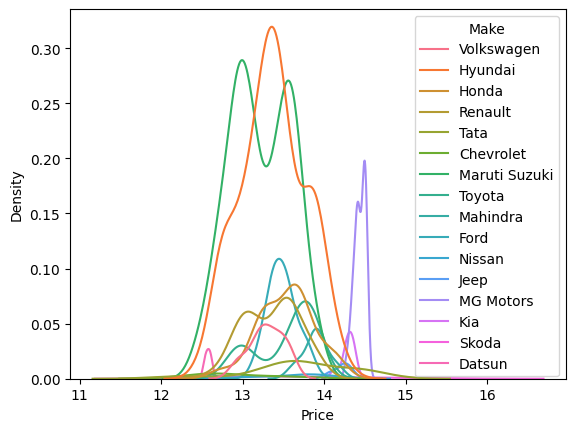

In [36]:
sns.kdeplot(data = df, x = 'Price', hue = 'Make');

In [37]:
X = df.drop('Price', axis=1)
y = df['Price']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [39]:
reg = LinearRegression()
reg.fit(X_train.select_dtypes(include=[np.number]), y_train)
y_pred = reg.predict(X_test.select_dtypes(include=[np.number]))
r2_model_1 = r2_score(y_test, y_pred)
rmse_model_1 = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2_model_1)
print(rmse_model_1)

0.42345169401376825
0.3372763678627449


In [41]:
X_train_model_2 = pd.get_dummies(X_train.select_dtypes(include=[object]))
X_test_model_2 = pd.get_dummies(X_test.select_dtypes(include=[object]))
X_test_model_2 = X_test_model_2.reindex(columns=X_train_model_2.columns, fill_value=0)
reg.fit(X_train_model_2, y_train)
y_pred_model_2 = reg.predict(X_test_model_2)
r2_model_2 = r2_score(y_test, y_pred_model_2)
rmse_model_2 = np.sqrt(mean_squared_error(y_test, y_pred_model_2))
print(r2_model_2)
print(rmse_model_2)

0.6865403662091141
0.24869031533781571


In [43]:
X_train_model_3 = pd.concat([X_train.select_dtypes(include=[np.number]), X_train_model_2], axis=1)
X_test_model_3 = pd.concat([X_test.select_dtypes(include=[np.number]), X_test_model_2], axis=1)
reg.fit(X_train_model_3, y_train)
y_pred_model_3 = reg.predict(X_test_model_3)
r2_model_3 = r2_score(y_test, y_pred_model_3)
rmse_model_3 = np.sqrt(mean_squared_error(y_test, y_pred_model_3))
print(r2_model_3)
print(rmse_model_3)



0.829756014932142
0.1832753047920933


In [44]:
expander = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = expander.fit_transform(X_train_model_3)
X_test_poly = expander.transform(X_test_model_3)
reg.fit(X_train_poly, y_train)
y_pred_poly = reg.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print(r2_poly)
print(rmse_poly)

-1535578.2643322488
550.4326430918815


In [46]:
expander = PolynomialFeatures(degree=3,include_bias=False)
X_train_poly = expander.fit_transform(X_train_model_3)
X_test_poly = expander.transform(X_test_model_3)
reg.fit(X_train_poly, y_train)
y_pred_poly = reg.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print(r2_poly)
print(rmse_poly)

-29782988.858518198
2424.1093623129073


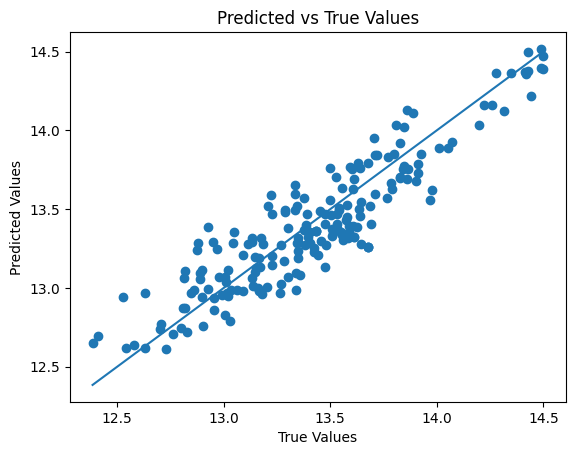

In [47]:
plt.scatter(y_test, y_pred_model_3)
plt.title('Predicted vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()

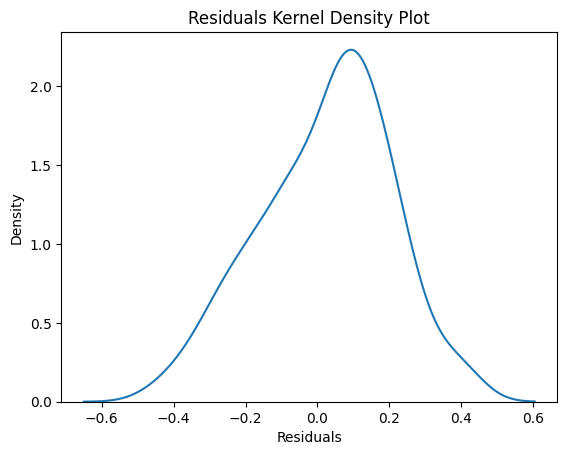

In [48]:
residuals_combined = y_test - y_pred_model_3
sns.kdeplot(residuals_combined)
plt.title('Residuals Kernel Density Plot')
plt.xlabel('Residuals')
plt.show()

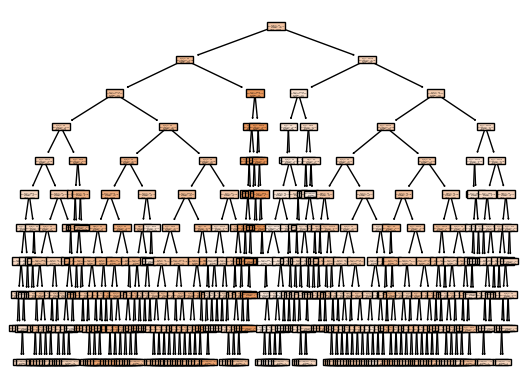

0.7937630379871072
0.20172109334438057


In [56]:
model = tree.DecisionTreeRegressor(max_depth=10)
cart = model.fit(X_train_model_3, y_train)
tree.plot_tree(cart,filled=True)
plt.show()
y_pred_tree_10 = model.predict(X_test_model_3)
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(r2_tree)
print(rmse_tree)

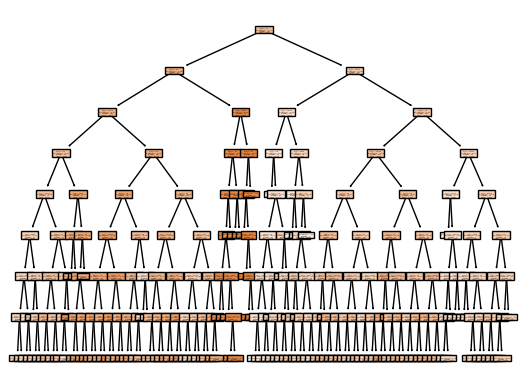

0.7361518801717529
0.22816291879366213


In [50]:
model = tree.DecisionTreeRegressor(max_depth=8)
cart = model.fit(X_train_model_3, y_train)
tree.plot_tree(cart,filled=True)
plt.show()
y_pred_tree = model.predict(X_test_model_3)
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(r2_tree)
print(rmse_tree)

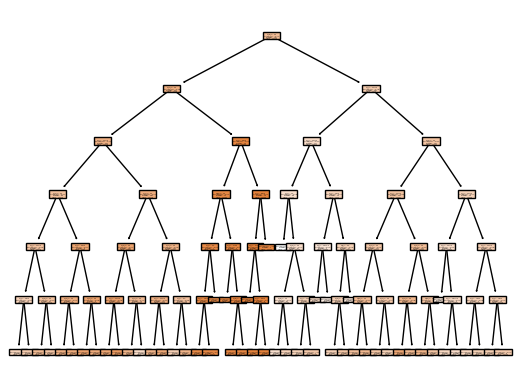

0.7222796178420978
0.234084112735944


In [51]:
model = tree.DecisionTreeRegressor(max_depth=6)
cart = model.fit(X_train_model_3, y_train)
tree.plot_tree(cart,filled=True)
plt.show()
y_pred_tree = model.predict(X_test_model_3)
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(r2_tree)
print(rmse_tree)

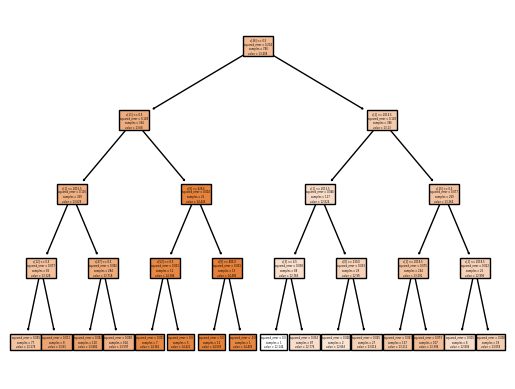

0.7189575371529946
0.23548000339133232


In [52]:
model = tree.DecisionTreeRegressor(max_depth=4)
cart = model.fit(X_train_model_3, y_train)
tree.plot_tree(cart,filled=True)
plt.show()
y_pred_tree = model.predict(X_test_model_3)
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(r2_tree)
print(rmse_tree)

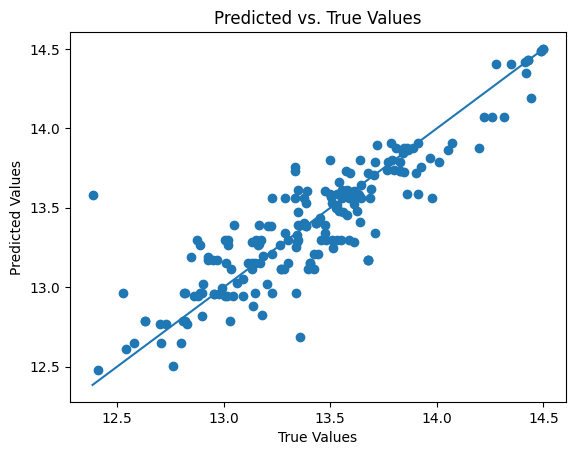

In [57]:
plt.scatter(y_test, y_pred_tree_10)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. True Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()

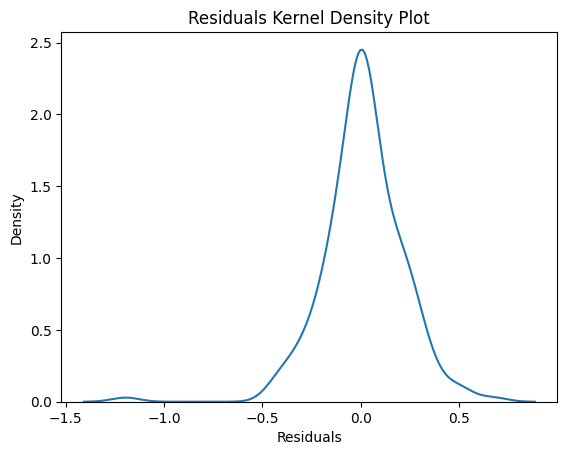

In [58]:
residuals_combined = y_test - y_pred_tree_10
sns.kdeplot(residuals_combined)
plt.title('Residuals Kernel Density Plot')
plt.xlabel('Residuals')
plt.show()

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't? Those who use a contraceptive have a higher number of individuals with children versus those who don't.
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here. When looking at the predicted contraception values, inbetween values are taken as opposed to whole numbers for the categories. Furthermore, the regression model doesn't fit the data.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception? The results make sense as short and long term contraception is much more common than none at all. the algorithm uses the variables provdied exceptoin for the method. Women with higher spouse education, higher education, and higher standard of living have more individuals that use short or long term birth control.
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  6. Why can't you use a linear probability model to do this exercise? Explain clearly in words. You cannpt use a linear model for data that is categorical.

In [60]:
df = pd.read_csv('./assignment4/data/contraception_hw.csv')

In [61]:
cross_tab = pd.crosstab(df['method'], df['numberChildren'])
print(cross_tab)

numberChildren  0    1    2    3   4   5   6   7   8   9   10  11  12  13  16
method                                                                       
1               95  143  114   70  57  44  35  18  29   5   9   6   4   0   0
2                0   46   56   70  62  36  27  19   9   3   2   2   0   1   0
3                2   87  106  119  78  55  30  12   9   8   0   3   0   1   1


In [62]:
y = df['method']
X = df.drop(['method'], axis=1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

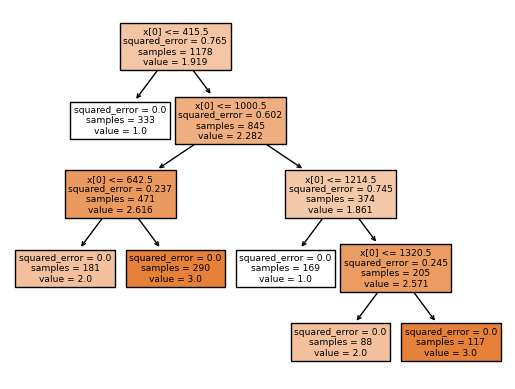

In [64]:
model = tree.DecisionTreeRegressor(max_depth=10)
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

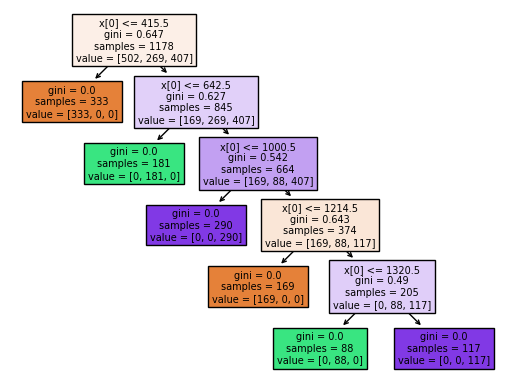

In [65]:
model = tree.DecisionTreeClassifier()
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

In [66]:
cross_tabs = {}

for column in X.columns:
    cross_tab = pd.crosstab(y, X[column])
    cross_tabs[column] = cross_tab

for column, cross_tab in cross_tabs.items():
    print(cross_tab)

Unnamed: 0  1     2     3     4     5     6     7     8     9     10    ...  \
method                                                                  ...   
1              1     1     1     1     1     1     1     1     1     1  ...   
2              0     0     0     0     0     0     0     0     0     0  ...   
3              0     0     0     0     0     0     0     0     0     0  ...   

Unnamed: 0  1464  1465  1466  1467  1468  1469  1470  1471  1472  1473  
method                                                                  
1              0     0     0     0     0     0     0     0     0     0  
2              0     0     0     0     0     0     0     0     0     0  
3              1     1     1     1     1     1     1     1     1     1  

[3 rows x 1473 columns]
age     16  17  18  19  20  21  22  23  24  25  ...  40  41  42  43  44  45  \
method                                          ...                           
1        2   2   5   9  17  19  27  21  24  33  ...  18 

In [68]:
tab = pd.crosstab(y_test,y_hat)
accuracy = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0])
print('Accuracy of Each Contraceptive Method: ', accuracy, '\n')
pd.crosstab(y_test,y_hat)

NameError: ignored

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?